In [5]:
import pandas as pd

from tqdm import tqdm
from scipy import stats

from news_vec.utils import read_json_gz_lines

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [2]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-acc-ts-ova.json/'))))

136500it [00:00, 351831.35it/s]


In [3]:
df.head(10)

,acc,domain,window
0,0.682680,wsj.com,64
1,0.719343,thehill.com,16
2,0.634640,huffingtonpost.com,1
3,0.656131,foxnews.com,47
4,0.687737,apnews.com,64
5,0.723135,apnews.com,68
6,0.609355,nytimes.com,58
7,0.739570,msnbc.com,20
8,0.589128,washingtonpost.com,58
9,0.730721,bloomberg.com,9


In [9]:
rows = []
for d in df.domain.unique():
    pdf = df[df.domain==d].sort_values('window')
    lr = stats.linregress(pdf.window, pdf.acc)
    rows.append((d, lr.slope, lr.rvalue, lr.pvalue))

In [10]:
lr_df = pd.DataFrame(rows, columns=('domain', 'slope', 'r', 'p'))

In [12]:
lr_df.sort_values('slope', ascending=False)

,domain,slope,r,p
3,foxnews.com,0.000453,0.555671,0.000000e+00
10,buzzfeed.com,0.000401,0.498490,0.000000e+00
0,wsj.com,0.000191,0.284071,1.751081e-168
13,dailycaller.com,0.000138,0.195054,1.000468e-78
9,breitbart.com,0.000077,0.115679,1.739303e-28
4,apnews.com,0.000055,0.085597,2.855107e-16
7,washingtonpost.com,0.000033,0.045615,1.342220e-05
8,bloomberg.com,0.000005,0.008411,4.223980e-01
12,npr.org,-0.000058,-0.086352,1.560576e-16
5,nytimes.com,-0.000083,-0.123161,4.288676e-32


foxnews.com


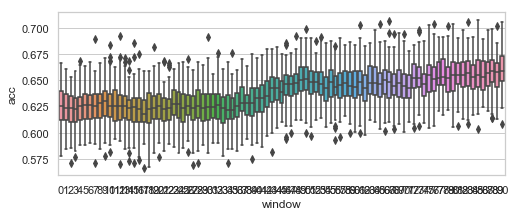

buzzfeed.com


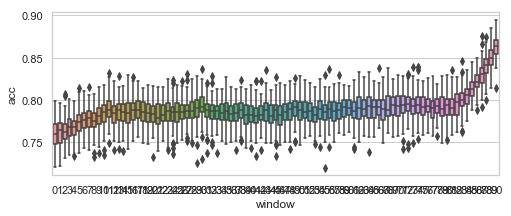

wsj.com


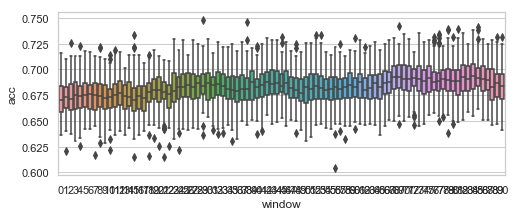

dailycaller.com


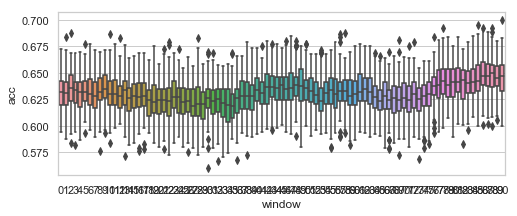

breitbart.com


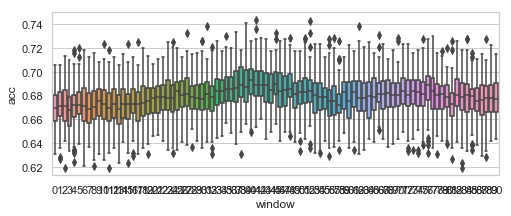

apnews.com


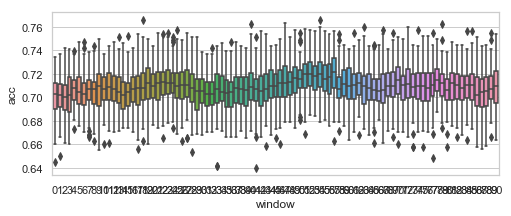

washingtonpost.com


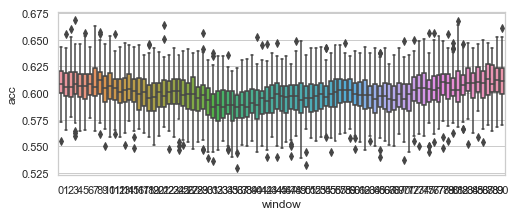

bloomberg.com


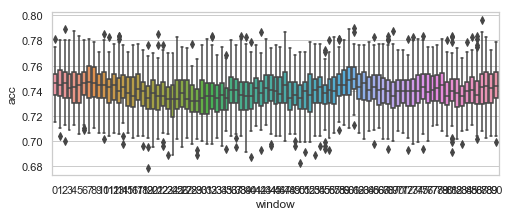

npr.org


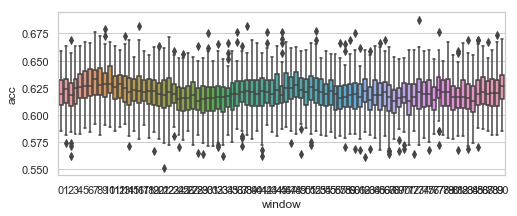

nytimes.com


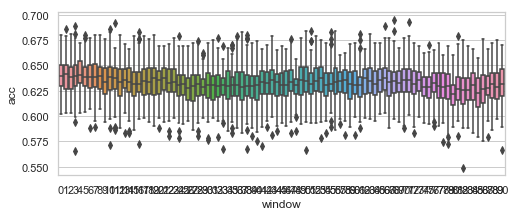

msnbc.com


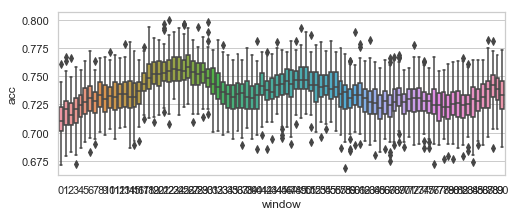

cnn.com


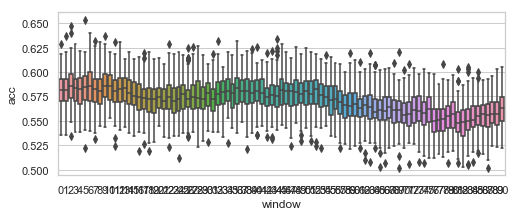

huffingtonpost.com


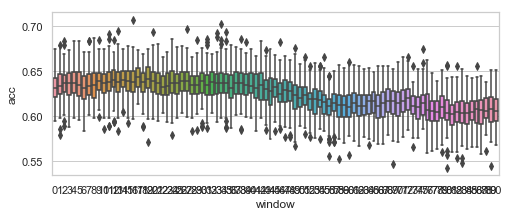

dailykos.com


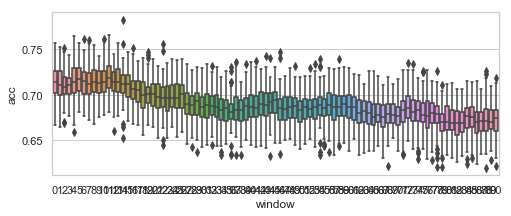

thehill.com


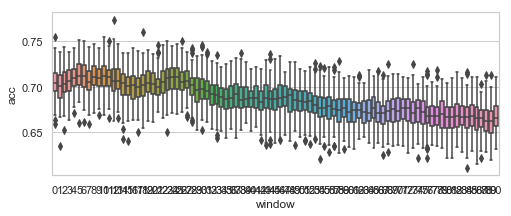

In [18]:
for d in lr_df.sort_values('slope', ascending=False).domain:
    
    pdf = df[df.domain==d].sort_values('window')
    
    print(d)
    plt.figure(figsize=(8,3))
    sns.boxplot(x='window', y='acc', data=pdf)
    plt.show()